**Association Rules**

Association rules analysis is a technique to uncover how items are associated to each other. Association rules can be thought of as an IF-THEN relationship. Suppose item A is being bought by the customer, then the chances of item B being picked by the customer too under the same Transaction ID is found out.

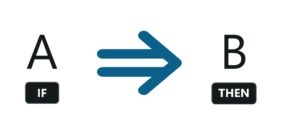 

There are two elements of these rules:

- `Antecedent (IF)`: This is an item/group of items that are typically found in the Itemsets or Datasets.
- `Consequent (THEN)`: This comes along as an item with an Antecedent/group of Antecedents

There are three common ways to measure association

`1. Support`
`2. Lift`
`3. Confidence`

**Support**

This says how popular an itemset is, as measured by the proportion of transactions in which an itemset appears

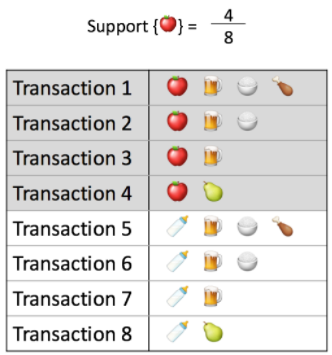

- Support of {apple} is 4 out of 8, or 50%
- Itemsets can also contain multiple items
- For instance, the support of {apple, beer, rice} is 2 out of 8, or 25%.

**Confidence**

This says how likely item Y is purchased when item X is purchased, expressed as {X -> Y}. This is measured by the proportion of transactions with item X, in which item Y also appears

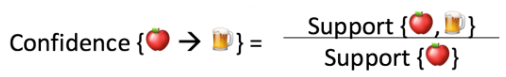

- Confidence of {apple -> beer} is 3 out of 4, or 75%

        One drawback of the confidence measure is that it might misrepresent the importance of an association
        This is because it only accounts for how popular apples are, but not beers
        If beers are also very popular in general, there will be a higher chance that a transaction containing apples will also contain beers, thus inflating the confidence measure
        To account for the base popularity of both constituent items, we use a third measure called lift.

**Lift**

This says how likely item Y is purchased when item X is purchased, while controlling for how popular item Y is

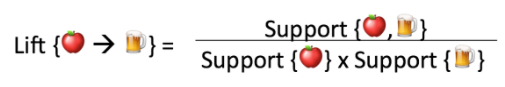

- The lift of {apple -> beer} is 1, which implies no association between items
- A lift value greater than 1 means that item Y is likely to be bought if item X is bought, while a value less than 1 means that item Y is unlikely to be bought if item X is bought

In [1]:
# Enabling print for all lines
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import os
os.getcwd()

'C:\\Users\\Administrator\\Downloads\\Python_work\\Edureka'

In [2]:
import pandas as pd
import numpy as np

# !pip install mlxtend
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

In [3]:
# Use this to read data from the csv file on local system.
df = pd.read_csv('retail_dataset.csv', sep=',')
df.head(10)
df.shape
df.info()

,0,1,2,3,4,5,6
0,Bread,Wine,Eggs,Meat,Cheese,Pencil,Diaper
1,Bread,Cheese,Meat,Diaper,Wine,Milk,Pencil
2,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
3,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
4,Meat,Pencil,Wine,NaN,NaN,NaN,NaN
5,Eggs,Bread,Wine,Pencil,Milk,Diaper,Bagel
6,Wine,Pencil,Eggs,Cheese,NaN,NaN,NaN
7,Bagel,Bread,Milk,Pencil,Diaper,NaN,NaN
8,Bread,Diaper,Cheese,Milk,Wine,Eggs,NaN
9,Bagel,Wine,Diaper,Meat,Pencil,Eggs,Cheese


(315, 7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       315 non-null    object
 1   1       285 non-null    object
 2   2       245 non-null    object
 3   3       187 non-null    object
 4   4       133 non-null    object
 5   5       71 non-null     object
 6   6       41 non-null     object
dtypes: object(7)
memory usage: 17.4+ KB


In [4]:
# The dataset is a sparse dataset as relatively high percentage of data is NA or NaN or equivalent. These NaNs make it hard
# to read the table. Let’s find out how many unique items are actually there in the table
items = set()
for col in df:
    items.update(df[col].unique())
print(items)

{nan, 'Milk', 'Bread', 'Bagel', 'Pencil', 'Diaper', 'Cheese', 'Eggs', 'Meat', 'Wine'}


`1. Data Preprocessing`

To make use of the apriori module given by mlxtend library, we need to convert the dataset according to it’s liking. apriori module requires a dataframe that has either 0 and 1 or True and False as data. The data we have is all string (name of items), we need to One Hot Encode the data

In [5]:
itemset = set(items)
encoded_vals = []
for index, row in df.iterrows():
    rowset = set(row) 
    labels = {}
    uncommons = list(itemset - rowset)
    commons = list(itemset.intersection(rowset))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)
encoded_vals[0]
ohe_df = pd.DataFrame(encoded_vals)

{nan: 0,
 'Bagel': 0,
 'Milk': 0,
 'Bread': 1,
 'Diaper': 1,
 'Pencil': 1,
 'Cheese': 1,
 'Eggs': 1,
 'Meat': 1,
 'Wine': 1}

`2. Applying Apriori`

apriori module from mlxtend library provides fast and efficient apriori implementation using the below syntax

`apriori(df, min_support=0.5, use_colnames=False, max_len=None, verbose=0, low_memory=False)`

`Parameters`

- `df` : One-Hot-Encoded DataFrame or DataFrame that has 0 and 1 or True and False as values
- `min_support` : Floating point value between 0 and 1 that indicates the minimum support required for an itemset to be selected. No. of observation with item / total observation# of observation with item / total observation
- `use_colnames` : This allows to preserve column names for itemset making it more readable
- `max_len` : Max length of itemset generated. If not set, all possible lengths are evaluated
- `verbose` : Shows the number of iterations if >= 1 and low_memory is True. If =1 and low_memory is False , shows the number of combinations
- `low_memory` : If True, uses an iterator to search for combinations above min_support. Note that while low_memory=True should only be used for large dataset if memory resources are limited, because this implementation is approx. 3–6x slower than the default

In [11]:
freq_items = apriori(ohe_df, min_support=0.2, use_colnames=True, verbose=1)
freq_items.head(10)

Processing 24 combinations | Sampling itemset size 4


,support,itemsets
0,0.869841,(nan)
1,0.425397,(Bagel)
2,0.501587,(Milk)
3,0.504762,(Bread)
4,0.406349,(Diaper)
5,0.361905,(Pencil)
6,0.501587,(Cheese)
7,0.438095,(Eggs)
8,0.476190,(Meat)
9,0.438095,(Wine)


The above output is a data frame with the support for each itemsets.

`3. Mining Association Rules`

Frequent if-then associations called association rules which consists of an antecedent (if) and a consequent (then).

Syntax for rules

`association_rules(df, metric='confidence', min_threshold=0.8, support_only=False)`

Metric can be set to confidence, lift, support, leverage and conviction

In [13]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.6)
rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bagel),(nan),0.425397,0.869841,0.336508,0.791045,0.909413,-0.033520,0.622902
1,(Milk),(nan),0.501587,0.869841,0.409524,0.816456,0.938626,-0.026778,0.709141
2,(Bread),(nan),0.504762,0.869841,0.396825,0.786164,0.903801,-0.042237,0.608683
3,(Diaper),(nan),0.406349,0.869841,0.317460,0.781250,0.898152,-0.035999,0.595011
4,(Pencil),(nan),0.361905,0.869841,0.266667,0.736842,0.847100,-0.048133,0.494603
5,(Cheese),(nan),0.501587,0.869841,0.393651,0.784810,0.902245,-0.042651,0.604855
6,(Eggs),(nan),0.438095,0.869841,0.336508,0.768116,0.883053,-0.044565,0.561310
7,(Meat),(nan),0.476190,0.869841,0.368254,0.773333,0.889051,-0.045956,0.574230
8,(Wine),(nan),0.438095,0.869841,0.317460,0.724638,0.833069,-0.063613,0.472682
9,(Bagel),(Bread),0.425397,0.504762,0.279365,0.656716,1.301042,0.064641,1.442650


The result of association analysis shows which item is frequently purchased with other items

`4. Visualizing results`

Text(0.5, 0, 'support')

Text(0, 0.5, 'confidence')

Text(0.5, 1.0, 'Support vs Confidence')

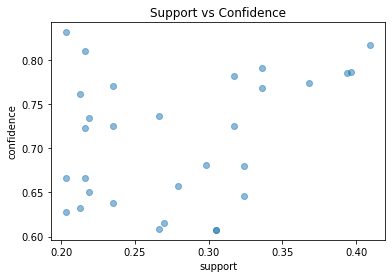

In [8]:
# Support vs Confidence
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

Text(0.5, 0, 'support')

Text(0, 0.5, 'lift')

Text(0.5, 1.0, 'Support vs Lift')

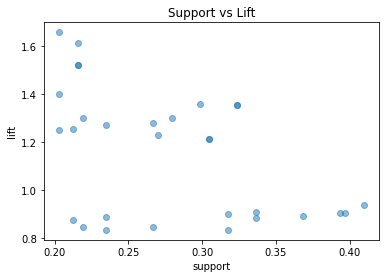

In [9]:
# Support vs Lift
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

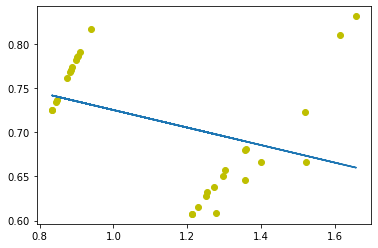

In [10]:
# Lift vs Confidence
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
fit_fn(rules['lift']));